In [133]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

###Loading Data

In [134]:
#trying this for amazon stocks
# stock symbol = AMZN
#loading the data

stk_symbol = 'AMZN'
st_data = yf.download(stk_symbol, start='2015-01-01', end='2023-05-01')

#data = st_data['Close'].values.reshape(-1, 1)

#normazlizing
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(st_data)
print(st_data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02   15.629000   15.737500   15.348000   15.426000   15.426000   
2015-01-05   15.350500   15.419000   15.042500   15.109500   15.109500   
2015-01-06   15.112000   15.150000   14.619000   14.764500   14.764500   
2015-01-07   14.875000   15.064000   14.766500   14.921000   14.921000   
2015-01-08   15.016000   15.157000   14.805500   15.023000   15.023000   
...                ...         ...         ...         ...         ...   
2023-04-24  107.660004  109.230003  105.070000  106.209999  106.209999   
2023-04-25  104.910004  105.449997  102.449997  102.570000  102.570000   
2023-04-26  105.040001  106.620003  104.099998  104.980003  104.980003   
2023-04-27  108.160004  110.860001  106.800003  109.820000  109.820000   
2023-04-28  107.730003  109.480003  104.330

In [135]:
from datetime import datetime
#store data in a seperate column
st_data['Date'] = st_data.index
st_data.index = range(1, len(st_data)+1)
st_data

,Open,High,Low,Close,Adj Close,Volume,Date
1,15.629000,15.737500,15.348000,15.426000,15.426000,55664000,2015-01-02
2,15.350500,15.419000,15.042500,15.109500,15.109500,55484000,2015-01-05
3,15.112000,15.150000,14.619000,14.764500,14.764500,70380000,2015-01-06
4,14.875000,15.064000,14.766500,14.921000,14.921000,52806000,2015-01-07
5,15.016000,15.157000,14.805500,15.023000,15.023000,61768000,2015-01-08
...,...,...,...,...,...,...,...
2091,107.660004,109.230003,105.070000,106.209999,106.209999,69575600,2023-04-24
2092,104.910004,105.449997,102.449997,102.570000,102.570000,65026800,2023-04-25
2093,105.040001,106.620003,104.099998,104.980003,104.980003,73803800,2023-04-26
2094,108.160004,110.860001,106.800003,109.820000,109.820000,149961200,2023-04-27


In [136]:
#after converting date time to date time format set it as index
#st_data.index = st_data.pop('Date')
st_data

,Open,High,Low,Close,Adj Close,Volume,Date
1,15.629000,15.737500,15.348000,15.426000,15.426000,55664000,2015-01-02
2,15.350500,15.419000,15.042500,15.109500,15.109500,55484000,2015-01-05
3,15.112000,15.150000,14.619000,14.764500,14.764500,70380000,2015-01-06
4,14.875000,15.064000,14.766500,14.921000,14.921000,52806000,2015-01-07
5,15.016000,15.157000,14.805500,15.023000,15.023000,61768000,2015-01-08
...,...,...,...,...,...,...,...
2091,107.660004,109.230003,105.070000,106.209999,106.209999,69575600,2023-04-24
2092,104.910004,105.449997,102.449997,102.570000,102.570000,65026800,2023-04-25
2093,105.040001,106.620003,104.099998,104.980003,104.980003,73803800,2023-04-26
2094,108.160004,110.860001,106.800003,109.820000,109.820000,149961200,2023-04-27


In [137]:
st_data.index

RangeIndex(start=1, stop=2096, step=1)

In [138]:
st_data = st_data[['Date','Close']]
#just keep the date
st_data['Date'] = st_data['Date'].apply(lambda x: x.timestamp())


<ipython-input-138-2235b8cbaa17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_data['Date'] = st_data['Date'].apply(lambda x: x.timestamp())


###Creating LSTM sequences

In [139]:
def create_sequences(stock_data, length):
  sequences = []
  target_prices = []
  dates = []

  for i in range(len(stock_data) - length):
      seq = stock_data['Close'][i:i+length]
      date = stock_data['Date'][i+length]
      target_price = stock_data['Close'][i+length]
      dates.append(date)
      sequences.append(seq)
      target_prices.append(target_price)

  return np.array(dates), np.array(sequences), np.array(target_prices)

In [140]:
#in this case sequence is our X and target is our Y or outcome price of stock
dates,seq,tar = create_sequences(st_data, 5)
print(seq)

[[ 15.42599964  15.10949993  14.76449966  14.92099953  15.02299976]
 [ 15.10949993  14.76449966  14.92099953  15.02299976  14.8465004 ]
 [ 14.76449966  14.92099953  15.02299976  14.8465004   14.57050037]
 ...
 [104.30000305 103.80999756 106.95999908 106.20999908 102.56999969]
 [103.80999756 106.95999908 106.20999908 102.56999969 104.98000336]
 [106.95999908 106.20999908 102.56999969 104.98000336 109.81999969]]


In [141]:
print(tar)

[ 15.02299976  14.8465004   14.57050037 ... 102.56999969 104.98000336
 109.81999969]


###Training LSTM

In [142]:
#splitting the data
split = int(len(seq)*0.7)
dates_train, dates_test, X_train, X_test, y_train, y_test = dates[:split], dates[split:], seq[:split], seq[split:], tar[:split], tar[split:]

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (5, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(y_train)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

[ 15.02299976  14.8465004   14.57050037 ... 160.352005   164.3164978
 158.13900757]
Epoch 1/20
46/46 [==============================] - 2s 11ms/step - loss: 1078.7046 - val_loss: 14.8177
Epoch 2/20
46/46 [==============================] - 0s 6ms/step - loss: 3.6266 - val_loss: 13.1689
Epoch 3/20
46/46 [==============================] - 0s 6ms/step - loss: 2.6675 - val_loss: 10.3405
Epoch 4/20
46/46 [==============================] - 0s 6ms/step - loss: 2.0770 - val_loss: 8.0004
Epoch 5/20
46/46 [==============================] - 0s 7ms/step - loss: 2.0650 - val_loss: 8.9223
Epoch 6/20
46/46 [==============================] - 0s 9ms/step - loss: 1.7985 - val_loss: 6.8399
Epoch 7/20
46/46 [==============================] - 0s 9ms/step - loss: 1.6498 - val_loss: 6.1196
Epoch 8/20
46/46 [==============================] - 1s 11ms/step - loss: 1.6600 - val_loss: 6.4104
Epoch 9/20
46/46 [==============================] - 0s 9ms/step - loss: 1.6904 - val_loss: 7.5853
Epoch 10/20
46/46 [=======

In [144]:
#loss on testing data
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

20/20 [==============================] - 0s 2ms/step


0.12476513343172495

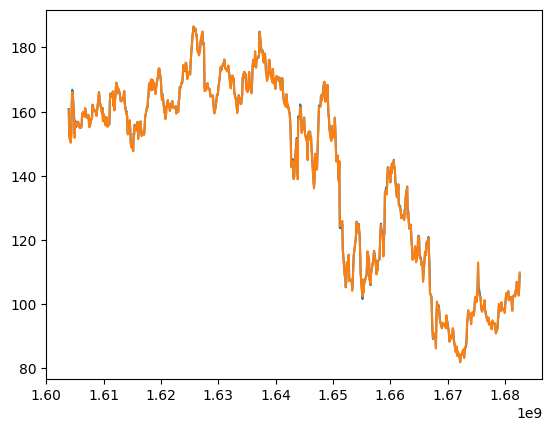

In [146]:
import matplotlib.pyplot as plt

plt.plot(dates_test, y_pred)
plt.plot(dates_test, y_test)
#giving almost the same prediction nice :)
#x column not visualizing properly